### Data Loading

- Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

- Loading the Dataset

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- Displaying The first Few rows of the dataset

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- Displaying last five rows of the dataset

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


-  Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


- Checking for missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- basic statistics

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- Understanding the target value distribution

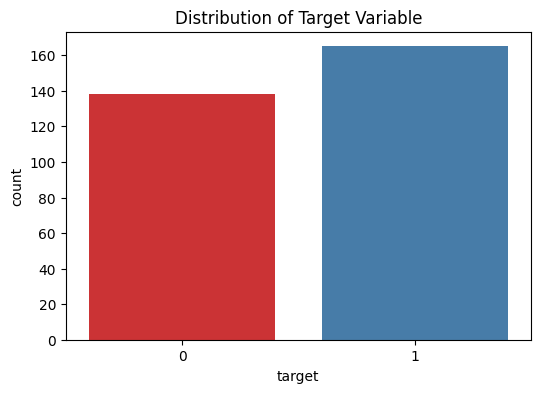

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='target',hue='target', data= df, palette='Set1', legend=False)
plt.title('Distribution of Target Variable')
plt.show()

- Checking the duplicate rows

In [9]:
df.duplicated().sum()

np.int64(1)

- dropping the duplicate rows

In [10]:
df = df.drop_duplicates()

- Dataset shape

In [11]:
df.shape

(302, 14)

### Exploratory Data Analysis (EDA)

- Pairplot for key features

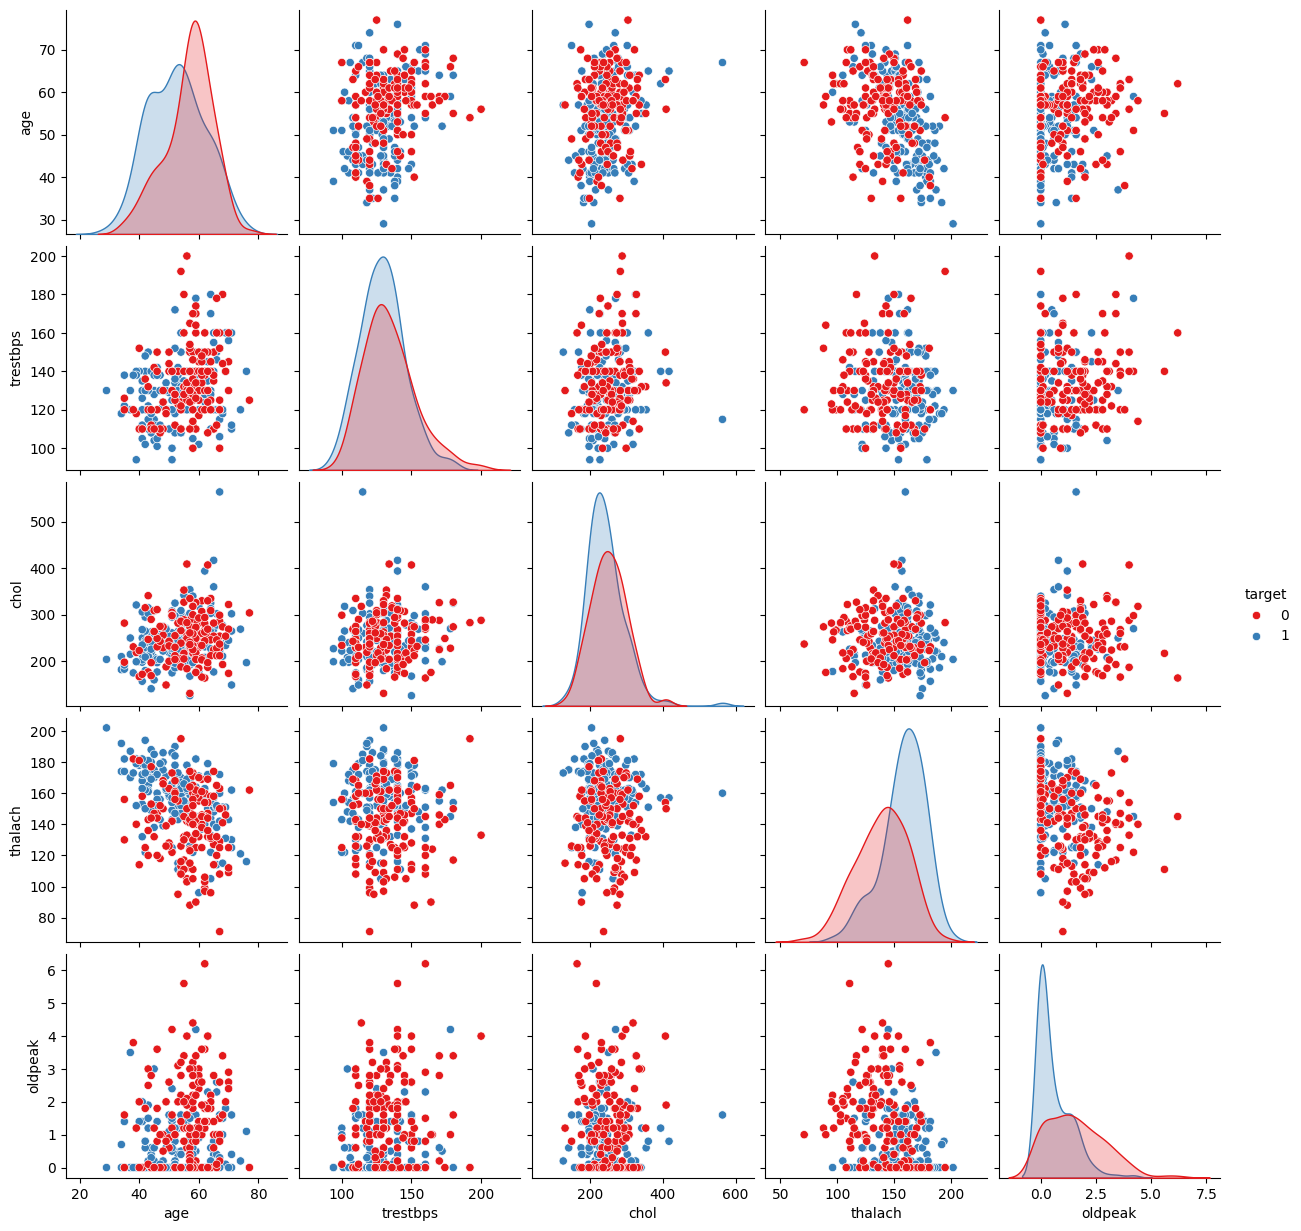

In [12]:
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue='target', palette='Set1')
plt.show()

- Correlation matrix

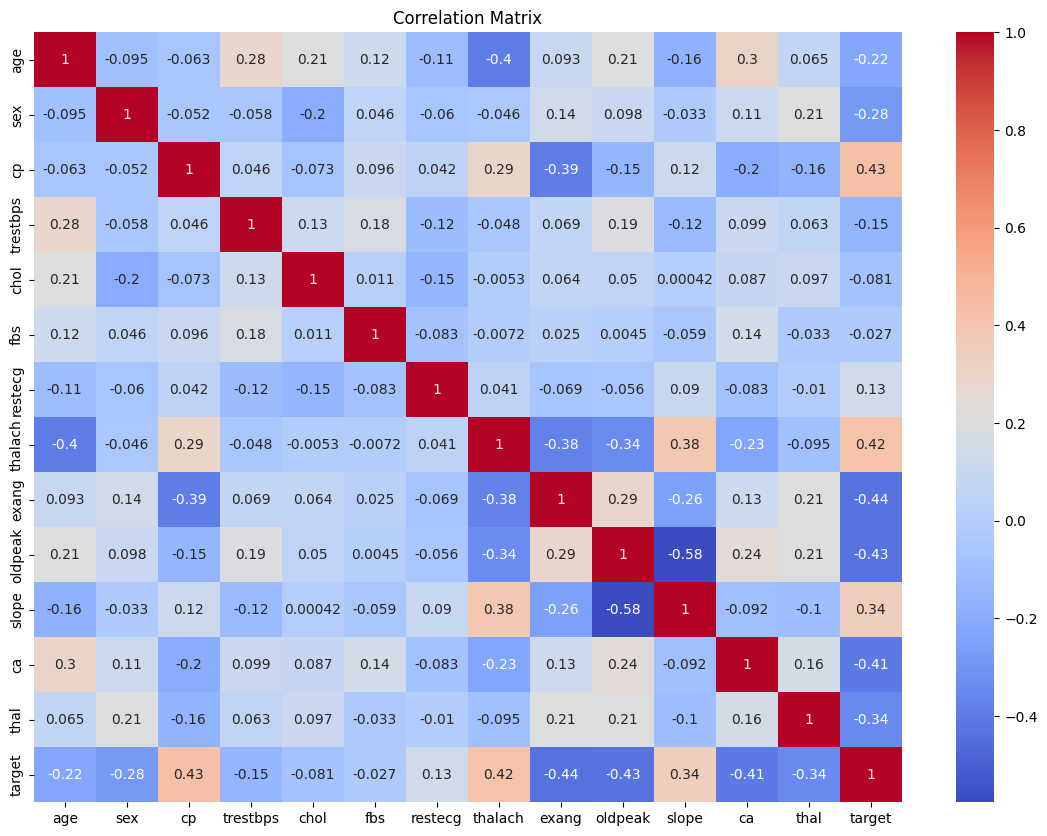

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Age Distribution

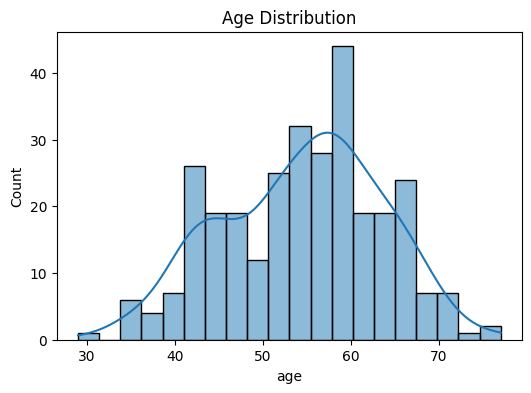

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

- Gender Distribution (sex Columns)

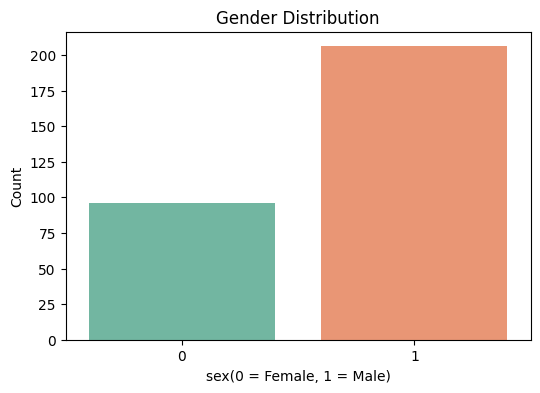

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex',hue='sex', data=df, palette='Set2', legend=False)
plt.title('Gender Distribution')
plt.xlabel('sex(0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

- Chest pain type distribution

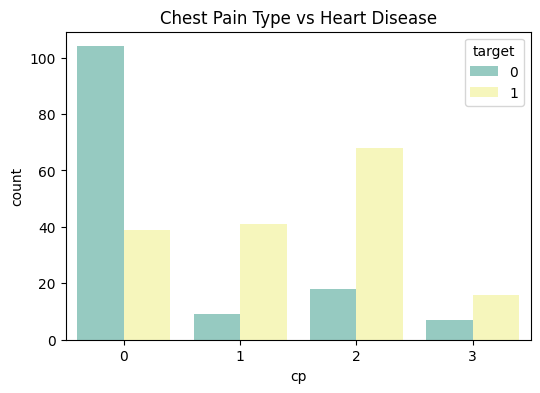

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='cp', hue='target', data=df, palette='Set3')
plt.title('Chest Pain Type vs Heart Disease')
plt.show()

- Maximum heart rate ditribution

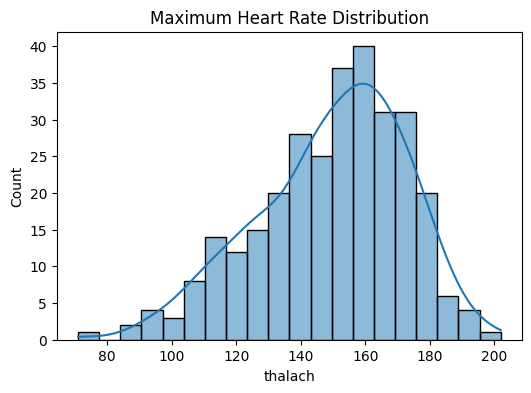

In [17]:
plt.figure(figsize=(6, 4))
sns.histplot(df['thalach'], bins=20, kde=True)
plt.title('Maximum Heart Rate Distribution')
plt.show()

- Boxplot of Cholesterol Levels by Target

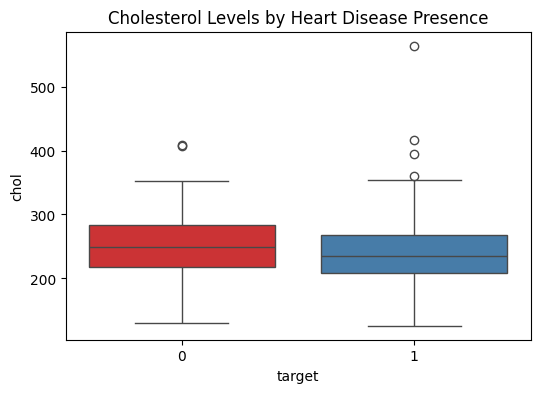

In [18]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target',hue='target', y='chol', data=df, palette='Set1', legend=False)
plt.title('Cholesterol Levels by Heart Disease Presence')
plt.show()

- Resting Blood Pressure Distribution

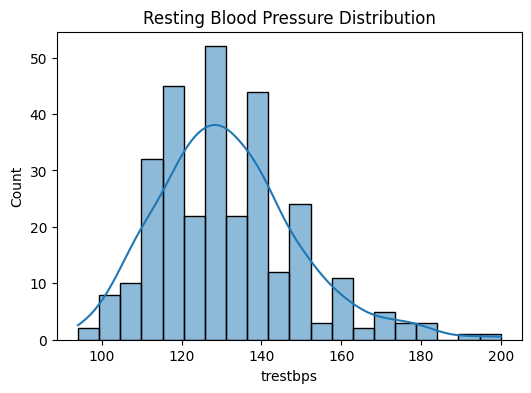

In [19]:
plt.figure(figsize=(6, 4))
sns.histplot(df['trestbps'], bins=20, kde=True)
plt.title('Resting Blood Pressure Distribution')
plt.show()

- Oldpeak vs Target

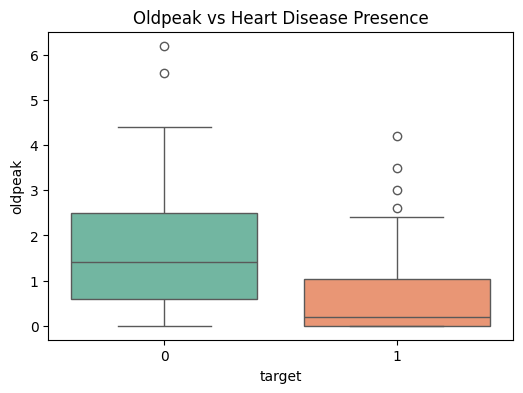

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='target',hue='target', y='oldpeak', data=df, palette='Set2', legend= False)
plt.title('Oldpeak vs Heart Disease Presence')
plt.show()

- Correlation Heatmap for Selected Features

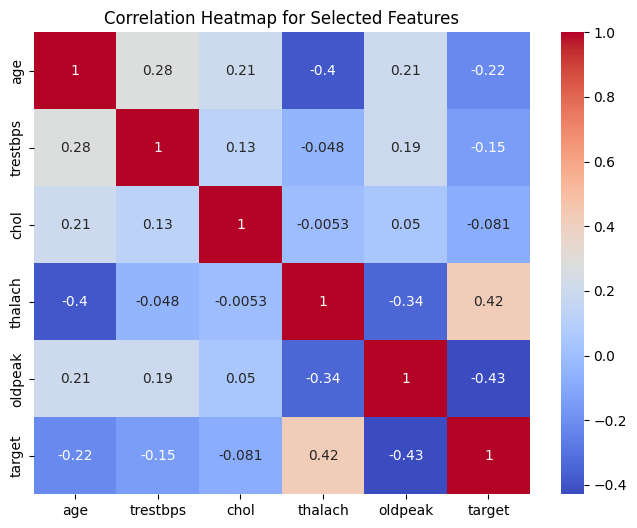

In [21]:
selected_features = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']]
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

### Data Processing

- separating feature and target

In [22]:
X = df.drop(columns=['target'])
y = df['target']

- Splitting the Data into Training and Testing Sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Standardizing the Feature Values

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- Checking the Scaled Data

In [25]:
pd.DataFrame(X_train_scaled, columns=X.columns).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.350641,0.731459,0.000000,-0.630711,0.927138,-0.391293,0.890028,0.549139,-0.659184,-0.895837,0.965436,-0.683490,-0.545762
1,1.487426,0.731459,0.966493,2.753363,0.526980,2.555631,-0.991522,0.012071,1.517027,0.543474,-0.684707,-0.683490,1.140502
2,1.378270,0.731459,-0.966493,-0.348705,0.145878,2.555631,0.890028,0.593894,-0.659184,-0.715923,-0.684707,1.350103,1.140502
3,0.068393,-1.367131,0.000000,0.215308,0.069658,-0.391293,-0.991522,0.504383,-0.659184,0.363560,-0.684707,-0.683490,-0.545762
4,1.050801,0.731459,0.966493,0.497314,1.689342,-0.391293,0.890028,0.370116,-0.659184,-0.895837,0.965436,-0.683490,-0.545762


- Checking the Shape of Training and Test Sets

In [26]:
print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (241, 13)
Test set shape: (61, 13)


- Feature Correlation with Target

In [27]:
corr_with_target = df.corr()['target'].sort_values(ascending=False)
print("Feature Correlation with Target:\n", corr_with_target)

Feature Correlation with Target:
 target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


- Dropping Features with Low Correlation

In [28]:
low_corr_features = ['fbs', 'restecg']
X_train_scaled = np.delete(X_train_scaled, [df.columns.get_loc(c) for c in low_corr_features], axis=1)
X_test_scaled = np.delete(X_test_scaled, [df.columns.get_loc(c) for c in low_corr_features], axis=1)

- Checking the Updated Features


In [29]:
X.columns.drop(low_corr_features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')

### Logistic Regression Model
- Training Logistic Regression Model

In [30]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

- Model Prediction

In [31]:
y_pred = logreg.predict(X_test_scaled)

- Model Accuracy

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 83.61%


- Confusion Matrix

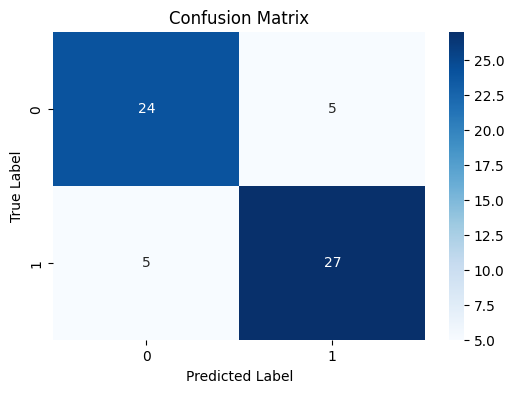

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- Classification Report

In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



- Feature Importance

In [35]:
num_coefficients = logreg.coef_[0].shape[0]
feature_names = X.columns[:num_coefficients]
coefficients = logreg.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
print("Feature Importance:\n", feature_importance)

Feature Importance:
      Feature  Coefficient
0        age    -0.005397
1        sex    -0.799810
2         cp     0.681655
3   trestbps    -0.440923
4       chol    -0.240186
5        fbs     0.537789
6    restecg    -0.475910
7    thalach    -0.493387
8      exang     0.472679
9    oldpeak    -0.779533
10     slope    -0.622715


- Feature Importance Barplot

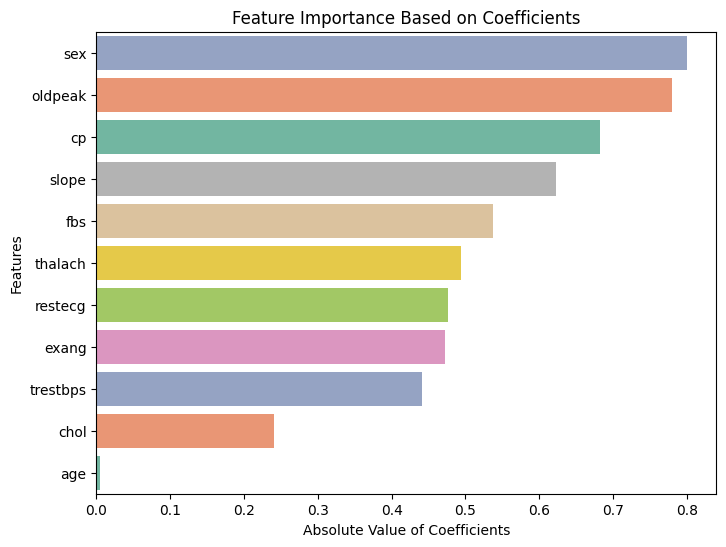

In [36]:
feature_importance['Absolute Value'] = feature_importance['Coefficient'].abs()

feature_importance = feature_importance.sort_values(by='Absolute Value', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Absolute Value',hue='Absolute Value', y='Feature', data=feature_importance, palette='Set2', legend=False)
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Absolute Value of Coefficients')
plt.ylabel('Features')
plt.show()

-  ROC Curve

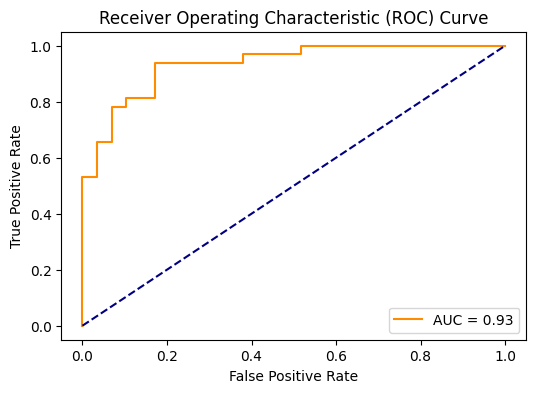

In [37]:
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

- Cross-Validation for Logistic Regression

In [38]:
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")

Cross-Validation Accuracy: 85.07%


- Actual vs Predicted comparison

In [39]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head(10)) 

     Actual  Predicted
180       0          0
229       0          0
111       1          1
247       0          0
60        1          1
9         1          1
119       1          1
224       0          0
268       0          0
33        1          0
